### This notebook contains the functions for performing convolution operation on a given input matrix(image channel) using a sqaure sized filter(odd prefered)

In [1]:
import numpy as np
from scipy import signal

### Create a sample numpy array of 5X5

In [2]:
x = np.array([[1, 1, 1, 0, 0],
                  [0, 1, 1, 1, 0],
                  [0, 0, 1, 1, 1],
                  [0, 0, 1, 1, 0],
                  [0, 1, 1, 0, 0]],
                 dtype='float')

In [3]:
x

array([[1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1.],
       [0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0.]])

### Idea Development 1: There can be many ways to implement efficient convolution operation. First we find all the sub matrices start and end index. And start positions for the vertical direction based on the stride and filter size given

In [4]:
filter_size=3
stride=1
index_list=[]
vertical_start_pos=[]
i=0
j=0
while j<x.shape[1]-1:
    j=(i+filter_size-1)
    index_list.append((i,j))
    vertical_start_pos.append(i)
    i+=stride
print("Index list for horizontal direction ->{}".format(index_list))
print("Vertical start indexes ->{}".format(vertical_start_pos))

Index list for horizontal direction ->[(0, 2), (1, 3), (2, 4)]
Vertical start indexes ->[0, 1, 2]


### Idea Development 2: Based on the found out start and end indices find all the sub matrices in the horizontal direction and vertical direction

In [5]:
v_mat=[]
for v_start in vertical_start_pos:
    h_mat=[]
    for indexes in index_list:    
        sub_matrice=[]
        for vertical_start in range(v_start,v_start+filter_size):    
            sub_matrice.append(x[vertical_start,][indexes[0]:indexes[1]+1])
        h_mat.append(np.array(sub_matrice))
    v_mat.append(h_mat)    

### Print all the sub matrices

In [6]:
for h_mat_set in v_mat:
    aa=h_mat_set
    cc=''
    for j in range(aa[0].shape[0]):
        for i in range(len(aa)):
            cc=cc+str(aa[i][j])+" "
        cc=cc+'\n'
    print(cc)    

[1. 1. 1.] [1. 1. 0.] [1. 0. 0.] 
[0. 1. 1.] [1. 1. 1.] [1. 1. 0.] 
[0. 0. 1.] [0. 1. 1.] [1. 1. 1.] 

[0. 1. 1.] [1. 1. 1.] [1. 1. 0.] 
[0. 0. 1.] [0. 1. 1.] [1. 1. 1.] 
[0. 0. 1.] [0. 1. 1.] [1. 1. 0.] 

[0. 0. 1.] [0. 1. 1.] [1. 1. 1.] 
[0. 0. 1.] [0. 1. 1.] [1. 1. 0.] 
[0. 1. 1.] [1. 1. 0.] [1. 0. 0.] 



### Define the filter[Kernel] 

In [7]:
filter_size=3
filt=np.random.choice([-1,1,0],size=[filter_size,filter_size])

### Show the sample convolution for the first row

In [8]:
tmp=v_mat[0][0]
res=tmp*filt
c='    I/P           K           O/P\n'
mid_index=(len(list(range(tmp.shape[0])))-1)/2
for i in range(tmp.shape[0]):
    c=c+str(tmp[i])
    if i==mid_index:
        c=c+' *'
    c=c+"   "+str(filt[i])
    if i==mid_index:
        c=c+' = '
    c=c+"  "+str(res[i])
    if i==mid_index:
        c=c+' -> sum(O/P)-> ' +str(np.sum(res))
    c=c+'\n'    
print(c)    

    I/P           K           O/P
[1. 1. 1.]   [-1  1 -1]  [-1.  1. -1.]
[0. 1. 1.] *   [ 1  1 -1] =   [ 0.  1. -1.] -> sum(O/P)-> 0.0
[0. 0. 1.]   [0 0 1]  [0. 0. 1.]



### Show convolution operation [Just an idea to show in Bokeh UI, nicely. Not complete (:]

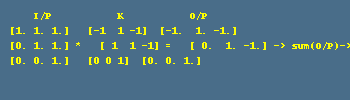

In [9]:
from PIL import Image, ImageDraw
img = Image.new('RGB', (350, 100), color = (73, 109, 137))
d = ImageDraw.Draw(img)
d.text((10,10), c, fill=(255,255,0))
img

### Modularize above ideas 

In [10]:
def calculate_sub_mat_indexs(mat,stride,filter_size):
    index_list=[]
    vertical_start_pos=[]
    i=0
    j=0
    while j<mat.shape[1]-1:
        j=(i+filter_size-1)
        index_list.append((i,j))
        vertical_start_pos.append(i)
        i+=stride
    return index_list, vertical_start_pos    

In [11]:
def find_submatrices(mat,index_list, vertical_start_pos,filter_size):
    v_mat=[]
    for v_start in vertical_start_pos:
        h_mat=[]
        for indexes in index_list:    
            sub_matrice=[]
            for vertical_start in range(v_start,v_start+filter_size):    
                sub_matrice.append(mat[vertical_start,][indexes[0]:indexes[1]+1])
            h_mat.append(np.array(sub_matrice))
        v_mat.append(h_mat)    
    return v_mat    

def print_sub_mats(v_mat):
    for h_mat_set in v_mat:
        aa=h_mat_set
        cc=''
        for j in range(aa[0].shape[0]):
            for i in range(len(aa)):
                cc=cc+str(aa[i][j])+" "
            cc=cc+'\n'
        print(cc)    
index_list, vertical_start_pos =calculate_sub_mat_indexs(x,1,3)
v_mat=find_submatrices(x,index_list, vertical_start_pos,3)
print_sub_mats(v_mat)

[1. 1. 1.] [1. 1. 0.] [1. 0. 0.] 
[0. 1. 1.] [1. 1. 1.] [1. 1. 0.] 
[0. 0. 1.] [0. 1. 1.] [1. 1. 1.] 

[0. 1. 1.] [1. 1. 1.] [1. 1. 0.] 
[0. 0. 1.] [0. 1. 1.] [1. 1. 1.] 
[0. 0. 1.] [0. 1. 1.] [1. 1. 0.] 

[0. 0. 1.] [0. 1. 1.] [1. 1. 1.] 
[0. 0. 1.] [0. 1. 1.] [1. 1. 0.] 
[0. 1. 1.] [1. 1. 0.] [1. 0. 0.] 



### Function to perform convolution

In [12]:
def show_convolve_oper(v_mat,filt,verbose=True):
    convolve_res_ver=[]
    mat_index=0
    for h_mats in v_mat:
        mat_index+=1
        if verbose:
            print("Showing Convolution for horizontal stack {}".format(mat_index))
        convolve_res_hor=[]
        for h_mat in h_mats:
            tmp=h_mat
            res=tmp*filt
            convolve_res_hor.append(np.sum(res))
            c='    I/P           K           O/P\n'
            mid_index=(len(list(range(tmp.shape[0])))-1)/2
            for i in range(tmp.shape[0]):
                c=c+str(tmp[i])
                if i==mid_index:
                    c=c+' *'
                c=c+"   "+str(filt[i])
                if i==mid_index:
                    c=c+' = '
                c=c+"  "+str(res[i])
                if i==mid_index:
                    c=c+' -> sum(O/P)-> ' +str(np.sum(res))
                c=c+'\n'
    #     mat_index+=1
            if verbose:
                print(c)
        convolve_res_ver.append(convolve_res_hor)
    return np.array(convolve_res_ver)    

In [13]:
convolve_res_ver=show_convolve_oper(v_mat,filt,verbose=False)

In [14]:
convolve_res_ver

array([[ 0.,  2.,  2.],
       [ 0.,  0.,  1.],
       [-1.,  0.,  1.]])